In [1]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import models, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def load_dataset(dataset_path):
    images = []
    labels = []
    for classfolder in os.listdir(dataset_path):
        subclassfolder = os.path.join(dataset_path, classfolder)
        for image_filename in os.listdir(subclassfolder):
            image_path = os.path.join(subclassfolder, image_filename)
            images.append(image_path)
            labels.append(classfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

In [3]:
PATH_DATASET_ORI = "./PlantVillage/color/"
PATH_DATASET_AUG_1 = "./PlantVillage/augmented_1/"
PATH_DATASET_AUG_2 = "./PlantVillage/augmented_2/"

In [4]:
data = load_dataset(PATH_DATASET_ORI)
data.head()

,image,label
0,./PlantVillage/color/Apple___Apple_scab\00075a...,Apple___Apple_scab
1,./PlantVillage/color/Apple___Apple_scab\01a663...,Apple___Apple_scab
2,./PlantVillage/color/Apple___Apple_scab\01f3de...,Apple___Apple_scab
3,./PlantVillage/color/Apple___Apple_scab\0208f4...,Apple___Apple_scab
4,./PlantVillage/color/Apple___Apple_scab\023123...,Apple___Apple_scab


In [5]:
dataset_aug_1 = load_dataset(PATH_DATASET_AUG_1)
dataset_aug_2 = load_dataset(PATH_DATASET_AUG_2)
print(dataset_aug_1.head())
print(dataset_aug_2.head())

                                               image               label
0  ./PlantVillage/augmented_1/Apple___Apple_scab\...  Apple___Apple_scab
1  ./PlantVillage/augmented_1/Apple___Apple_scab\...  Apple___Apple_scab
2  ./PlantVillage/augmented_1/Apple___Apple_scab\...  Apple___Apple_scab
3  ./PlantVillage/augmented_1/Apple___Apple_scab\...  Apple___Apple_scab
4  ./PlantVillage/augmented_1/Apple___Apple_scab\...  Apple___Apple_scab
                                               image               label
0  ./PlantVillage/augmented_2/Apple___Apple_scab\...  Apple___Apple_scab
1  ./PlantVillage/augmented_2/Apple___Apple_scab\...  Apple___Apple_scab
2  ./PlantVillage/augmented_2/Apple___Apple_scab\...  Apple___Apple_scab
3  ./PlantVillage/augmented_2/Apple___Apple_scab\...  Apple___Apple_scab
4  ./PlantVillage/augmented_2/Apple___Apple_scab\...  Apple___Apple_scab


#### Train Val Test 1 (Augmentation 1)

In [6]:
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(dataset_aug_1['image'], dataset_aug_1['label'], test_size=0.2, random_state=42,shuffle=True,stratify=dataset_aug_1['label'])
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1,y_temp_1, test_size=0.5, random_state=42,shuffle=True,stratify=y_temp_1)
df_train_1 = pd.DataFrame({'image': X_train_1, 'label': y_train_1})
df_test_1 = pd.DataFrame({'image': X_test_1, 'label': y_test_1})
df_val_1 = pd.DataFrame({'image': X_val_1, 'label': y_val_1})

#### Train Val Test 2 (Augmentation 2)

In [7]:
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(dataset_aug_2['image'], dataset_aug_2['label'], test_size=0.2, random_state=42,shuffle=True,stratify=dataset_aug_2['label'])
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2,y_temp_2, test_size=0.5, random_state=42,shuffle=True,stratify=y_temp_2)
df_train_2 = pd.DataFrame({'image': X_train_2, 'label': y_train_2})
df_test_2 = pd.DataFrame({'image': X_test_2, 'label': y_test_2})
df_val_2 = pd.DataFrame({'image': X_val_2, 'label': y_val_2})

In [8]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3943 entries, 31163 to 14305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3943 non-null   object
 1   label   3943 non-null   object
dtypes: object(2)
memory usage: 92.4+ KB


In [9]:
dist_data = data['label'].value_counts()
dist_data

label
Orange___Haunglongbing_(Citrus_greening)              5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus                5357
Soybean___healthy                                     5090
Peach___Bacterial_spot                                2297
Tomato___Bacterial_spot                               2127
Tomato___Late_blight                                  1909
Squash___Powdery_mildew                               1835
Tomato___Septoria_leaf_spot                           1771
Tomato___Spider_mites Two-spotted_spider_mite         1676
Apple___healthy                                       1645
Tomato___healthy                                      1591
Blueberry___healthy                                   1502
Pepper,_bell___healthy                                1478
Tomato___Target_Spot                                  1404
Grape___Esca_(Black_Measles)                          1383
Corn_(maize)___Common_rust_                           1192
Grape___Black_rot                                 

In [10]:
print(len(dist_data))
dist_data.index.get_loc('Tomato___Tomato_Yellow_Leaf_Curl_Virus')

38


1

In [11]:
label_thous = dist_data[dist_data>630].index
label_thous

Index(['Orange___Haunglongbing_(Citrus_greening)',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Soybean___healthy',
       'Peach___Bacterial_spot', 'Tomato___Bacterial_spot',
       'Tomato___Late_blight', 'Squash___Powdery_mildew',
       'Tomato___Septoria_leaf_spot',
       'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___healthy',
       'Tomato___healthy', 'Blueberry___healthy', 'Pepper,_bell___healthy',
       'Tomato___Target_Spot', 'Grape___Esca_(Black_Measles)',
       'Corn_(maize)___Common_rust_', 'Grape___Black_rot',
       'Corn_(maize)___healthy', 'Strawberry___Leaf_scorch',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
       'Cherry_(including_sour)___Powdery_mildew', 'Potato___Early_blight',
       'Potato___Late_blight', 'Tomato___Early_blight',
       'Pepper,_bell___Bacterial_spot', 'Corn_(maize)___Northern_Leaf_Blight',
       'Tomato___Leaf_Mold', 'Cherry_(including_sour)___healthy'],
      dtype='object', name='label')

In [12]:
label = [0]*len(dist_data)
label[dist_data.index.get_loc('Tomato___Tomato_Yellow_Leaf_Curl_Virus')] = 1
label

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [13]:
# def custom_generator(dataframe, datagen_aug, datagen_non, target_size, batch_size=32):
#     img_batch = []
#     img_label = []
#     for index, row in dataframe.iterrows():
#         label = [0]*len(dist_data)
#         img = load_img(row['image'], target_size=target_size)  # Load gambar
#         img_array = img_to_array(img)  # Konversi ke array
#         img_array = np.expand_dims(img_array, axis=0)

#         # Augmenting images for labels with 1000 images because we didn't add images with 1000 images before
#         if row['label'] in label_thous:
#             # print("augmenting")
#             for batch in datagen_aug.flow(img_array, batch_size=1): # batch shape (1, 256, 256, 3)
#                 aug_img_array = batch[0]                            # Take the first image from the batch
#                 break
#             # or
#             # aug_img_array = next(datagen.flow(img_array, batch_size=1))
#         else:
#             # print("non augmenting")
#             for batch in datagen_non.flow(img_array, batch_size=1):
#                 aug_img_array = batch[0] # Take the first image from the batch
#                 break  # not augmenting image
        
#         label[dist_data.index.get_loc(row['label'])] = 1
#         img_batch.append(aug_img_array)
#         img_label.append(label)
        
#         if len(img_batch) == batch_size:
#             yield (np.array(img_batch), np.array(img_label))
#             img_batch = []
#             img_label = []
            
#     if len(img_batch) > 0:
#         yield (np.array(img_batch), np.array(img_label))

In [14]:
# help(ImageDataGenerator)

In [15]:
# datagen = ImageDataGenerator(
#     rescale=1.0/255
# )

# help(datagen.flow_from_dataframe)

### With Data Augmentation Again

In [16]:
# image_size = (256, 256)
# batch_size = 32

# datagen = ImageDataGenerator(
#     rescale=1.0/255
# )

# # First Augmentation
# datagen_aug_1 = ImageDataGenerator(
#     rescale=1.0/255, 
#     rotation_range=30,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )

# # Second Augmentation
# datagen_aug_2 = ImageDataGenerator(
#     rescale=1.0/255, 
#     rotation_range=30,
#     # width_shift_range=0.1,
#     # height_shift_range=0.1,
#     # shear_range=0.2,
#     # zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )

# train_generator_aug_1 = custom_generator(df_train_1, datagen_aug_1,datagen, image_size, batch_size)
# test_generator_aug_1 = custom_generator(df_test_1, datagen_aug_1,datagen, image_size, batch_size)
# val_generator_aug_1 = custom_generator(df_val_1, datagen_aug_1,datagen, image_size, batch_size)

# train_generator_aug_2 = custom_generator(df_train_2, datagen_aug_2,datagen, image_size, batch_size)
# test_generator_aug_2 = custom_generator(df_test_2, datagen_aug_2,datagen, image_size, batch_size)
# val_generator_aug_2 = custom_generator(df_val_2, datagen_aug_2,datagen, image_size, batch_size)

In [ ]:
image_size = (256, 256)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255
)

# First Augmentation
datagen_aug_1 = ImageDataGenerator(
    rescale=1.0/255, 
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Second Augmentation
datagen_aug_2 = ImageDataGenerator(
    rescale=1.0/255, 
    rotation_range=30,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator_aug_1 = datagen_aug_1.flow_from_dataframe(
    df_train_1,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

test_generator_1 = datagen.flow_from_dataframe( # For Augmentation again and not_1
    df_test_1,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator_1 = datagen.flow_from_dataframe( # For Augmentation again and not_1
    df_val_1,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

train_generator_aug_2 = datagen_aug_2.flow_from_dataframe(
    df_train_2,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

test_generator_2 = datagen.flow_from_dataframe( # For Augmentation again and not_2
    df_test_2,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator_2 = datagen.flow_from_dataframe( # For Augmentation again and not_2
    df_val_2,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 31542 validated image filenames belonging to 38 classes.
Found 3943 validated image filenames belonging to 38 classes.
Found 3943 validated image filenames belonging to 38 classes.
Found 31543 validated image filenames belonging to 38 classes.
Found 3943 validated image filenames belonging to 38 classes.
Found 3943 validated image filenames belonging to 38 classes.


In [18]:
train_generator_aug_1.reset()
for _, labels in train_generator_aug_1:
    print(np.argmax(labels, axis=1))
    break

[ 2 24  0 27 30 25 29 34 11 10 20 31  8 26 18  0  0 28  0  2 35  6 14 23
 17 13  0 25 18 12  5  3]


In [19]:
# test_generator_1.reset()
for _, labels in test_generator_1:
    print(np.argmax(labels,axis=1))
    break

[29 29  6 25 26 24  0  1 36 27 27  7 21 21  5 36 31 15 10  5 18  0 34 27
 11  6  9 34 10 23 18 36]


In [20]:
# test_generator_1.reset()
for _, labels in test_generator_1:
    print(np.argmax(labels,axis=1))
    break

[ 4 17  0 35 25 19  1 28 37 13 22  6 31 19 23 20  1 36  1  8 22 21  7 11
 22 18 13  6 17 13 34 31]


In [21]:
df_test_1.shape[0]

3943

In [22]:
df_test_1['label'].value_counts()

label
Strawberry___healthy                                  137
Grape___healthy                                       127
Apple___Apple_scab                                    126
Apple___Black_rot                                     124
Tomato___Tomato_mosaic_virus                          112
Raspberry___healthy                                   111
Apple___Cedar_apple_rust                              110
Peach___healthy                                       108
Potato___healthy                                      107
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    102
Soybean___healthy                                     100
Corn_(maize)___Common_rust_                           100
Tomato___healthy                                      100
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)            100
Potato___Early_blight                                 100
Tomato___Septoria_leaf_spot                           100
Grape___Esca_(Black_Measles)                          100
Pepper,_

In [23]:
from collections import Counter

counter = Counter()
count=1
for _, labels in test_generator_1:
    counter.update(np.argmax(labels, axis=1))
    if count==(np.ceil(df_test_1.shape[0]/batch_size))*2:
        break
    count+=1
    # if sum(counter.values()) == df_test_1.shape[0]:
    #     break
counter, sum(counter.values())

(Counter({27: 274,
          14: 254,
          0: 252,
          1: 248,
          36: 224,
          23: 222,
          2: 220,
          17: 216,
          22: 214,
          7: 204,
          13: 200,
          4: 200,
          21: 200,
          35: 200,
          11: 200,
          26: 200,
          19: 200,
          37: 200,
          12: 200,
          32: 200,
          34: 200,
          24: 200,
          20: 200,
          10: 200,
          33: 200,
          25: 200,
          18: 200,
          16: 200,
          28: 200,
          15: 200,
          30: 200,
          3: 200,
          5: 200,
          29: 200,
          8: 200,
          9: 198,
          31: 190,
          6: 170}),
 7886)

##### So we can use .reset() in test_generator and val_generator for consistent data order, but if we don't use it, it's okay because the distribution of the number of labels will remain the same.

In [24]:
# train_generator_aug_1.class_indices

In [25]:
for (image_batch_1, label_batch_1), (image_batch_2, label_batch_2) in zip(train_generator_aug_1,train_generator_aug_2):
    # print(image_batch.shape)
    break
print("Image batch (1 and 2) shape: ", image_batch_1.shape, image_batch_2.shape)
print("Label batch (1 and 2) shape: ", label_batch_1.shape, label_batch_2.shape)

Image batch (1 and 2) shape:  (32, 256, 256, 3) (32, 256, 256, 3)
Label batch (1 and 2) shape:  (32, 38) (32, 38)


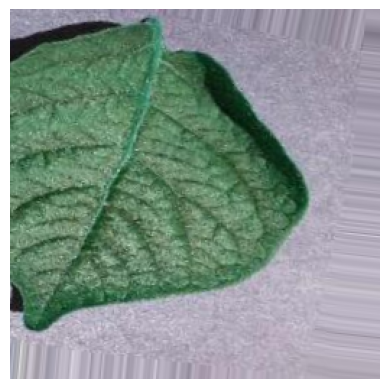

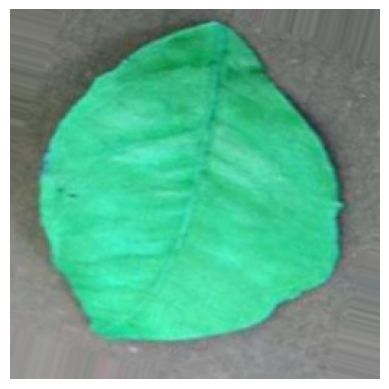

In [26]:
for (image_batch_1, label_batch_1), (image_batch_2, label_batch_2) in zip(train_generator_aug_1,train_generator_aug_2):
    for image in image_batch_1:
        # print(image)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        break
    for image in image_batch_2:
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        break
    break

In [27]:
type(train_generator_aug_1)

keras.preprocessing.image.DataFrameIterator

### Without Data Augmentation Again

In [28]:
train_generator_1 = datagen.flow_from_dataframe(
    df_train_1,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

train_generator_2 = datagen.flow_from_dataframe(
    df_train_2,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 31542 validated image filenames belonging to 38 classes.
Found 31543 validated image filenames belonging to 38 classes.


In [29]:
for (image_batch_1, label_batch_1), (image_batch_2, label_batch_2) in zip(train_generator_1,train_generator_2):
    # print(image_batch.shape)
    break
print("Image batch (1 and 2) shape: ", image_batch_1.shape, image_batch_2.shape)
print("Label batch (1 and 2) shape: ", label_batch_1.shape, label_batch_2.shape)

Image batch (1 and 2) shape:  (32, 256, 256, 3) (32, 256, 256, 3)
Label batch (1 and 2) shape:  (32, 38) (32, 38)


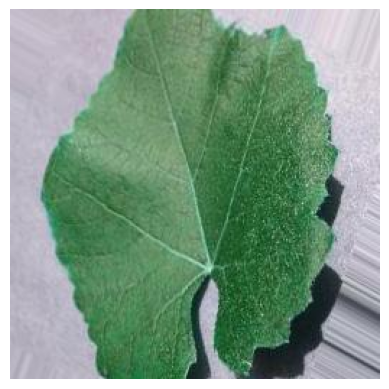

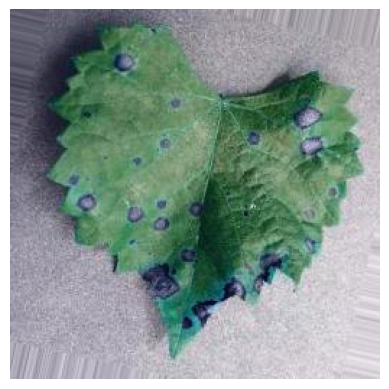

In [30]:
for (image_batch_1, label_batch_1), (image_batch_2, label_batch_2) in zip(train_generator_1,train_generator_2):
    for image in image_batch_1:
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        break
    for image in image_batch_2:
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        break
    break

In [31]:
type(train_generator_1)

keras.preprocessing.image.DataFrameIterator

## Modelling -> ResNet50

In [32]:
# resnet50 = tf.keras.applications.ResNet50(
#     include_top=False,
#     weights='imagenet',
#     input_shape=(256, 256, 3)
# )

# resnet50v2 = tf.keras.applications.ResNet50V2(
#     include_top=False,
#     weights='imagenet',
#     input_shape=(256, 256, 3),
# )

# for layer in resnet50.layers[-4:]:
#     print(layer.name)
# print()
# for layer in resnet50v2.layers[-6:]:
#     print(layer.name)

In [37]:
pretrained_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    input_shape=(256, 256, 3),
    weights="imagenet",
    pooling="avg",
    # classes=38
)

for layer in pretrained_model.layers:
    layer.trainable = False

resnet50v2 = models.Sequential([
    pretrained_model,
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
]
)
print(pretrained_model.layers[-7:])
# for layer in pretrained_model.layers[-10:]:
#     layer.trainable = True
    
# print(resnet50.layers[-1],resnet50.layers[-1].trainable)
    
resnet50v2.summary()

[<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002BBFD85F9D0>, <keras.layers.core.activation.Activation object at 0x000002BBFD83ED40>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000002BBFD83F040>, <keras.layers.merging.add.Add object at 0x000002BBFD85DEA0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002BBFD83D330>, <keras.layers.core.activation.Activation object at 0x000002BBFD83F370>, <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x000002BBFD83C7C0>]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
      

In [38]:
# help(EarlyStopping)

In [39]:
# adam = tf.keras.optimizers.Adam(learning_rate=0.001)

resnet50v2.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
epochs = 10
# checkpoint = ModelCheckpoint('Models/ResNet50_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

### Augmented Data Again - Augmentation 1

In [40]:
checkpoint = ModelCheckpoint('Models/ResNet50V2_aug1.h5', monitor='val_loss', save_best_only=True, verbose=1)
history_aug_1 = resnet50v2.fit(
    train_generator_aug_1,
    validation_data=val_generator_1,
    epochs=epochs,
    callbacks=[earlystopping, checkpoint]
)

Epoch 1/10
236/986 [======>.......................] - ETA: 5:01 - loss: 1.5866 - accuracy: 0.5722

KeyboardInterrupt: 

In [ ]:
# help(resnet50v2.evaluate)

In [ ]:
eval = resnet50v2.evaluate(test_generator_1)
print("Augmented Data Again - Augmentation 1 Accuracy: ", eval[1])
print("Augmented Data Again - Augmentation 1 Loss: ", eval[0])

124/124 [==============================] - 19s 154ms/step - loss: 0.2500 - accuracy: 0.9191
Augmented Data Again - Augmentation 1 Accuracy:  0.9190971255302429
Augmented Data Again - Augmentation 1 Loss:  0.24999043345451355


In [ ]:
# Reused because each experiment used the same
y_true_1 = test_generator_1.classes
y_true_2 = test_generator_2.classes

In [ ]:
y_pred = resnet50v2.predict(test_generator_1)
y_pred_aug1 = np.argmax(y_pred, axis=1)
print(f"Pred: {y_pred_aug1[10:15]}")
print(f"True: {y_true_1[10:15]}")

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

### Augmented Data Again - Augmentation 2

In [ ]:
resnet50v2 = models.Sequential([
    pretrained_model,
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
]
)

resnet50v2.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint('Models/ResNet50V2_aug2.h5', monitor='val_loss', save_best_only=True, verbose=1)
history_aug_2 = resnet50v2.fit(
    train_generator_aug_2,
    validation_data=val_generator_2,
    epochs=epochs,
    callbacks=[earlystopping, checkpoint]
)

In [ ]:
acc = resnet50v2.evaluate(test_generator_2)
print("Augmented Data Again - Augmentation 2 Accuracy: ", acc[1])
print("Augmented Data Again - Augmentation 2 Loss: ", acc[0])

In [ ]:
y_pred = resnet50v2.predict(test_generator_2)
y_pred_aug2 = np.argmax(y_pred, axis=1)
print(f"Pred: {y_pred_aug2[10:15]}")
print(f"True: {y_true_2[10:15]}")

### Withoud Augmented Data Again -  Augmentation 1

In [ ]:
resnet50v2 = models.Sequential([
    pretrained_model,
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
]
)

resnet50v2.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint('Models/ResNet50V2_without_aug1.h5', monitor='val_loss', save_best_only=True, verbose=1)
history_without_aug1 = resnet50v2.fit(
    train_generator_1,
    validation_data=val_generator_1,
    epochs=epochs,
    callbacks=[earlystopping, checkpoint]
)

Epoch 1/3
986/986 [==============================] - ETA: 0s - loss: 0.6162 - accuracy: 0.8198
Epoch 1: val_loss improved from inf to 0.18991, saving model to Models\ResNet50V2_without_aug1.h5
986/986 [==============================] - 78s 77ms/step - loss: 0.6162 - accuracy: 0.8198 - val_loss: 0.1899 - val_accuracy: 0.9374
Epoch 2/3
986/986 [==============================] - ETA: 0s - loss: 0.2733 - accuracy: 0.9131
Epoch 2: val_loss improved from 0.18991 to 0.14097, saving model to Models\ResNet50V2_without_aug1.h5
986/986 [==============================] - 76s 77ms/step - loss: 0.2733 - accuracy: 0.9131 - val_loss: 0.1410 - val_accuracy: 0.9533
Epoch 3/3
986/986 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.9263
Epoch 3: val_loss improved from 0.14097 to 0.12365, saving model to Models\ResNet50V2_without_aug1.h5
986/986 [==============================] - 76s 77ms/step - loss: 0.2256 - accuracy: 0.9263 - val_loss: 0.1236 - val_accuracy: 0.9604


In [ ]:
acc = resnet50v2.evaluate(test_generator_1)
print("Without Augmentation - Augmentation 1 Accuracy: ", acc[1])
print("Without Augmentation - Augmentation 1 Loss: ", acc[0])

124/124 [==============================] - 9s 67ms/step - loss: 0.1340 - accuracy: 0.9546
Without Augmentation - Augmentation 1 Accuracy:  0.9546030759811401
Without Augmentation - Augmentation 1 Loss:  0.134034663438797


In [ ]:
y_pred = resnet50v2.predict(test_generator_1)
y_pred_without_aug1 = np.argmax(y_pred, axis=1)
print(f"Pred: {y_pred_without_aug1[10:15]}")
print(f"True: {y_true_1[10:15]}")

124/124 [==============================] - 8s 66ms/step
[27  7 21 21  5]
[27  7 21 21  5]


### Withoud Augmented Data Again -  Augmentation 2

In [ ]:
resnet50v2 = models.Sequential([
    pretrained_model,
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
]
)

resnet50v2.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint('Models/ResNet50V2_without_aug2.h5', monitor='val_loss', save_best_only=True, verbose=1)
history_without_aug2 = resnet50v2.fit(
    train_generator_2,
    validation_data=val_generator_2,
    epochs=epochs,
    callbacks=[earlystopping, checkpoint]
)

Epoch 1/10
 10/986 [..............................] - ETA: 3:32 - loss: 0.1827 - accuracy: 0.9438

KeyboardInterrupt: 

In [ ]:
acc = resnet50v2.evaluate(test_generator_2)
print("Without Augmentation - Augmentation 2 Accuracy: ", acc[1])
print("Without Augmentation - Augmentation 2 Loss: ", acc[0])

In [ ]:
y_pred = resnet50v2.predict(test_generator_2)
y_pred_without_aug2 = np.argmax(y_pred, axis=1)
print(f"Pred: {y_pred_without_aug2[10:15]}")
print(f"True: {y_true_2[10:15]}")

## Evaluate Model

In [ ]:
# Plotting
def plot_history(history):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_history(history_aug_1)
plot_history(history_aug_2)
plot_history(history_without_aug1)
plot_history(history_without_aug2)

### Confusion Matrix and Classification Report

In [ ]:
test_generator_1.reset()

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

plot_confusion_matrix(y_true_1, y_pred_aug1, test_generator_1.class_indices.keys(), 'Augmented Data Again - Augmentation 1')
plot_confusion_matrix(y_true_2, y_pred_aug2, test_generator_2.class_indices.keys(), 'Augmented Data Again - Augmentation 2')
plot_confusion_matrix(y_true_1, y_pred_without_aug1, test_generator_1.class_indices.keys(), 'Without Augmentation Again - Augmentation 1')
plot_confusion_matrix(y_true_2, y_pred_without_aug2, test_generator_2.class_indices.keys(), 'Without Augmentation Again - Augmentation 2')

In [ ]:
def classification_report_dataframe(y_true, y_pred, labels):
    cr = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    cr_df = pd.DataFrame(cr).transpose()
    return cr_df

cr_df_aug1 = classification_report_dataframe(y_true_1, y_pred_aug1, test_generator_1.class_indices.keys())
cr_df_aug2 = classification_report_dataframe(y_true_2, y_pred_aug2, test_generator_2.class_indices.keys())
cr_df_without_aug1 = classification_report_dataframe(y_true_1, y_pred_without_aug1, test_generator_1.class_indices.keys())
cr_df_without_aug2 = classification_report_dataframe(y_true_2, y_pred_without_aug2, test_generator_2.class_indices.keys())

print(cr_df_aug1)
print(cr_df_aug2)
print(cr_df_without_aug1)
print(cr_df_without_aug2)